In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [556]:
data=pd.read_csv('laptop_data.csv')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [557]:
data=data.drop('Unnamed: 0',axis=1)
data=data.drop('ScreenResolution',axis=1)

In [558]:
data.info

<bound method DataFrame.info of      Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
.

In [559]:
data=pd.concat([data.drop('Company',axis=1),pd.get_dummies(data.Company)],axis=1)
data=pd.concat([data.drop('TypeName',axis=1),pd.get_dummies(data.TypeName)],axis=1)
data=pd.concat([data.drop('Cpu',axis=1),pd.get_dummies(data.Cpu)],axis=1)
data=pd.concat([data.drop('Gpu',axis=1),pd.get_dummies(data.Gpu)],axis=1)
data=pd.concat([data.drop('Memory',axis=1),pd.get_dummies(data.Memory)],axis=1)
data=pd.concat([data.drop('OpSys',axis=1),pd.get_dummies(data.OpSys)],axis=1)

In [560]:
data['Ram'] = data['Ram'].str.extract('(\d+)').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '')
data

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,8GB SSD,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8,1.37,71378.6832,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,135195.3360,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.8,33992.6400,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1299,13.3,16,1.3,79866.7200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1300,14.0,2,1.5,12201.1200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1301,15.6,6,2.19,40705.9200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<Axes: >

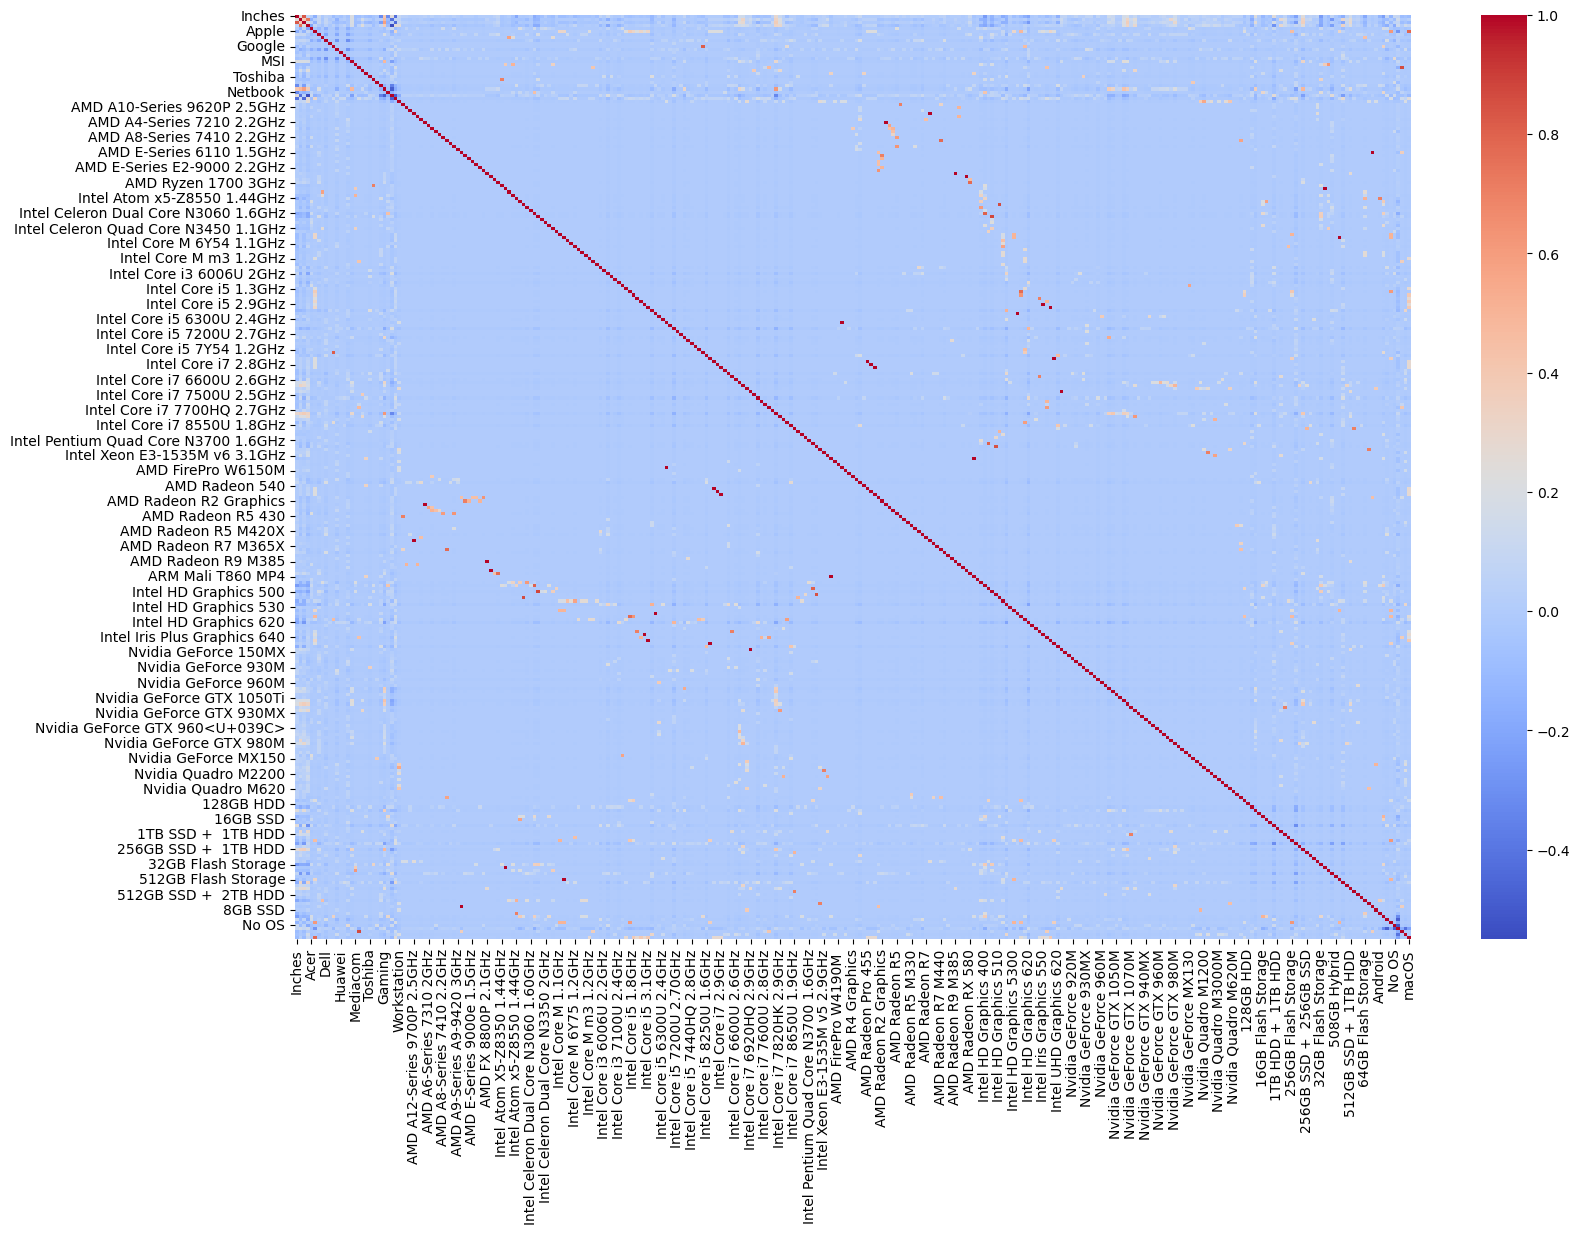

In [561]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=False,cmap='coolwarm')

In [562]:
correlations=data.corr()["Price"].abs()
sortedCorrelation=correlations.sort_values()
numOfColsToDrop=int(0.8*len(data.columns))
clos_to_drop=sortedCorrelation.iloc[:numOfColsToDrop].index
data_dropped=data.drop(clos_to_drop,axis=1)

<Axes: >

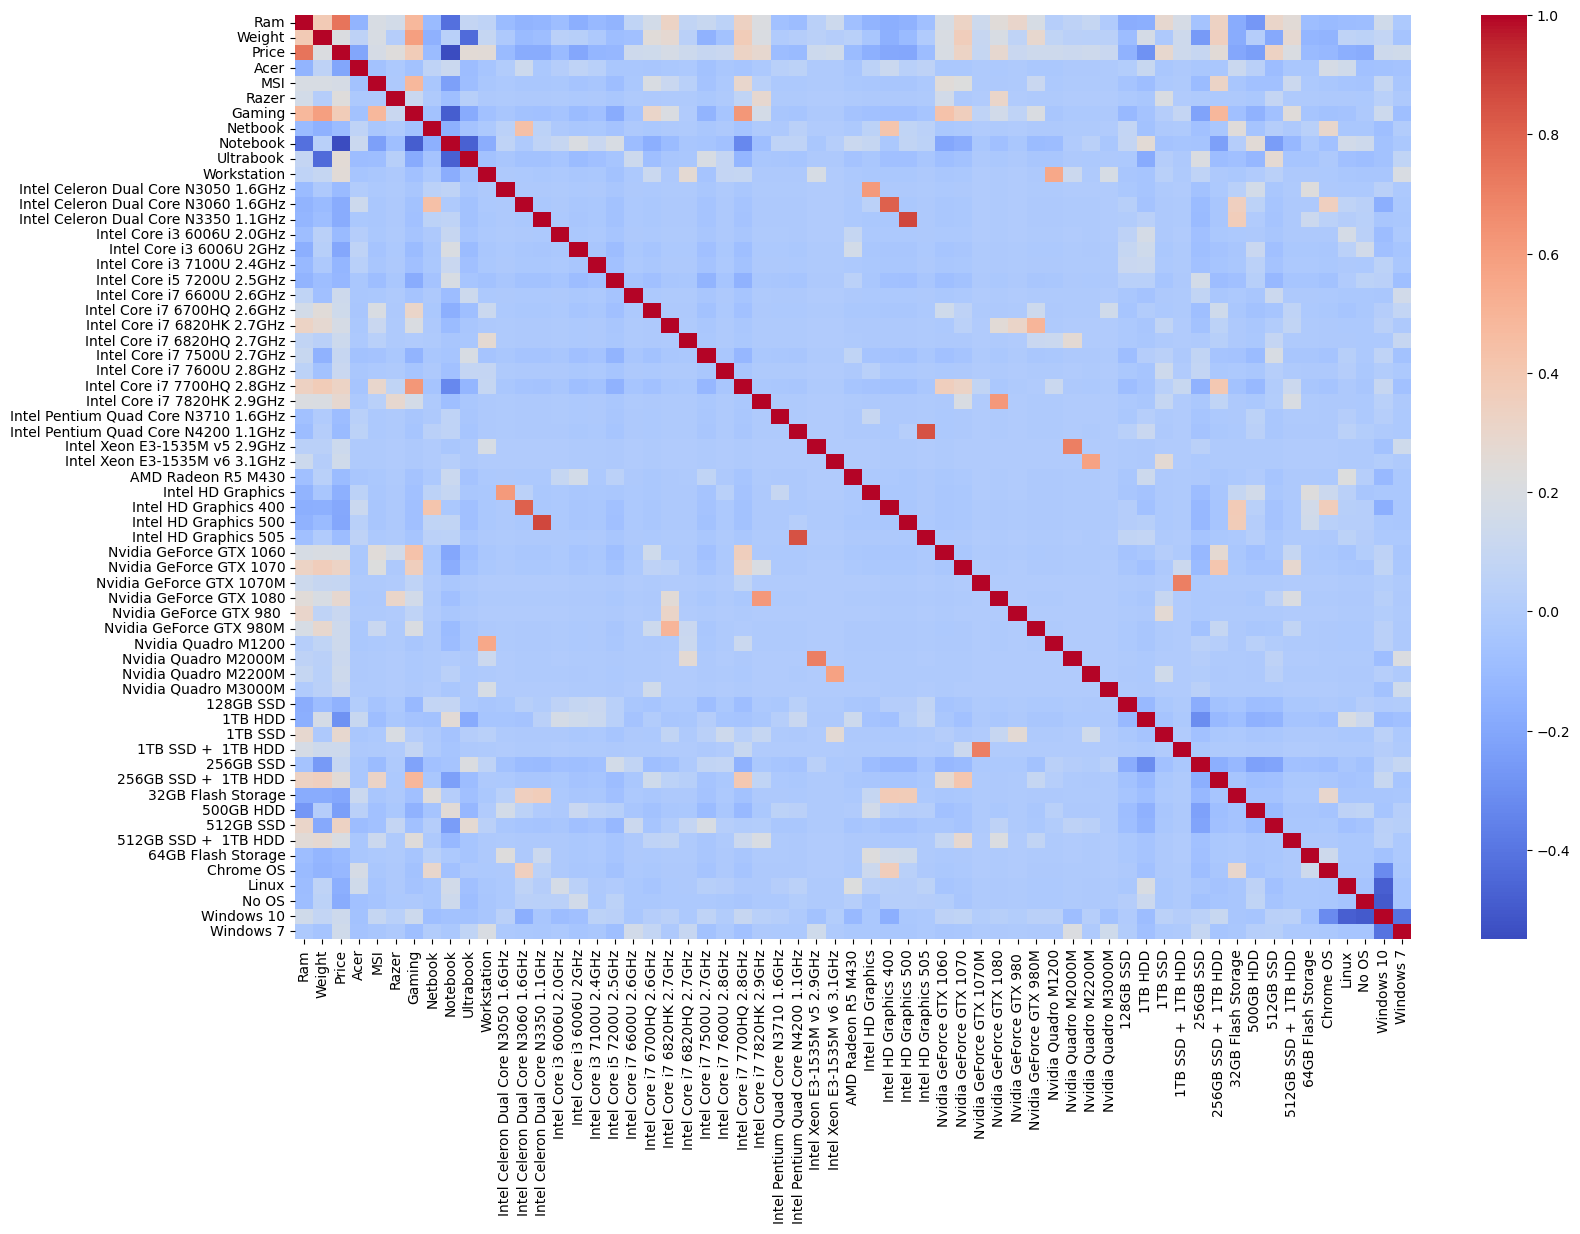

In [563]:
plt.figure(figsize=(18,12))
sns.heatmap(data_dropped.corr(),annot=False,cmap='coolwarm')

In [564]:
correlations=data_dropped.corr()["Price"].abs()
sortedCorrelation=correlations.sort_values()
sortedCorrelation

Intel HD Graphics 505                   0.093502
Intel Pentium Quad Core N3710 1.6GHz    0.094101
Netbook                                 0.097572
Nvidia GeForce GTX 1070M                0.097772
AMD Radeon R5 M430                      0.098645
                                          ...   
512GB SSD                               0.332894
Gaming                                  0.375789
Notebook                                0.549248
Ram                                     0.743007
Price                                   1.000000
Name: Price, Length: 61, dtype: float64

In [565]:
from sklearn.model_selection import train_test_split

train_data , test_data=train_test_split(data,test_size=0.2)

In [566]:
train_data

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,8GB SSD,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
1092,17.3,8,2.7,85194.7200,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
862,13.3,4,1.05,68464.8000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
573,15.6,8,2.3,44222.4000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
714,15.6,16,1.93,76012.4448,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
261,15.6,4,2.2,23656.3200,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,14.0,8,1.27,124621.9200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1195,15.6,12,2.21,70702.5600,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
623,15.6,8,2.2,42570.7200,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
561,15.6,4,2.05,33566.4000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [567]:
test_data

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,8GB SSD,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
600,15.6,8,1.84,64948.320,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
893,14.0,8,1.32,95850.720,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
323,15.6,8,2.1,48058.560,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
540,13.3,8,1.2,74538.720,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1044,14.0,4,1.54,53280.000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,11.6,4,1.4,23176.800,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1256,17.3,16,4.0,101232.000,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1054,13.3,16,1.2,120093.120,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
496,15.6,8,2.17,47893.392,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [568]:

train_x=train_data.drop('Price',axis=1)
train_y=train_data['Price']

test_x=test_data.drop('Price',axis=1)
test_y=test_data['Price']



In [569]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [570]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_x, train_y)

RandomForestRegressor()

In [571]:
forest_reg.score(test_x,test_y)

0.8342902046064214

In [592]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[50,100,250],
    'max_depth' : [5,10,100,None],
    'min_samples_split' : [2,4],
    'max_features' :['sqrt','log2']
}

grid_search=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,verbose=10)

In [593]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.518 total time=   0.0s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.492 total time=   0.0s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.558 total time=   0.0s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.478 total time=   0.0s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 100, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [594]:
forest=grid_search.best_estimator_
forest.score(test_x,test_y)

0.8342820017210686

In [595]:
importances=dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances={k:v for k,v in sorted (importances.items(),key=lambda x : x[1],reverse=True)}
forest

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=250)

In [576]:
importances

{'Ram': 0.15568138973799858,
 'Weight': 0.09802520121561803,
 'Notebook': 0.08459087998980218,
 'Inches': 0.0420111943752891,
 '512GB SSD': 0.03885365477834585,
 'Gaming': 0.028054644146966217,
 'Nvidia GeForce GTX 1070': 0.026679429197407106,
 '1TB HDD': 0.02427216109161083,
 'Intel Core i7 7700HQ 2.8GHz': 0.024013781823941,
 '1TB SSD': 0.02382944422200282,
 'Ultrabook': 0.021169414622831104,
 'Workstation': 0.02078432091740988,
 '256GB SSD': 0.015252621670674524,
 'Intel Core i7 7820HK 2.9GHz': 0.01401992626044201,
 '256GB SSD +  1TB HDD': 0.01178502591164086,
 'Nvidia GeForce GTX 1080': 0.01132777174133208,
 '500GB HDD': 0.010885823010649564,
 'Windows 7': 0.009992710893418673,
 'Intel Xeon E3-1535M v6 3.1GHz': 0.008978280120919679,
 'Nvidia GeForce GTX 1060': 0.008773196139936264,
 'Razer': 0.008741715479696033,
 'Nvidia GeForce GTX 1050': 0.008664579137301849,
 '32GB Flash Storage': 0.008581403480346406,
 'Dell': 0.00828200099657076,
 'Lenovo': 0.008241017254364465,
 'Intel Core i

In [577]:
data['Nvidia GeForce GTX 1070'].value_counts()

Nvidia GeForce GTX 1070
False    1273
True       30
Name: count, dtype: int64

In [578]:
data['Gaming'].value_counts()

Gaming
False    1098
True      205
Name: count, dtype: int64

In [579]:
data['Notebook'].value_counts()

Notebook
True     727
False    576
Name: count, dtype: int64